In [1]:
import cogsworth
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u

In [2]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
pd.options.display.max_columns = 999

In [3]:
p = cogsworth.pop.Population(2500, use_default_BSE_settings=True)
p.create_population()

Run for 2500 binaries
Ended up with 3301 binaries with m1 > 0 solar masses
[1e-02s] Sample initial binaries
[0.8s] Evolve binaries (run COSMIC)


3310it [00:04, 779.72it/s]                           


[5.6s] Get orbits (run gala)
Overall: 6.5s


In [4]:
p.get_observables(filters=["Gaia_G_EDR3", "Gaia_BP_EDR3", "Gaia_RP_EDR3"],
                  ignore_extinction=False, assume_mw_galactocentric=True,
                  silence_bounds_warning=True);

In [5]:
p.observables

,Av_1,Av_2,M_abs_1,m_app_1,M_abs_2,m_app_2,Gaia_G_EDR3_app_1,Gaia_G_EDR3_app_2,teff_obs,log_g_obs,secondary_brighter,Gaia_G_EDR3_abs_1,Gaia_G_EDR3_abs_2,Gaia_BP_EDR3_app_1,Gaia_BP_EDR3_app_2,Gaia_BP_EDR3_abs_1,Gaia_BP_EDR3_abs_2,Gaia_RP_EDR3_app_1,Gaia_RP_EDR3_app_2,Gaia_RP_EDR3_abs_1,Gaia_RP_EDR3_abs_2
0,5.940000,6.0,10.505755,24.951013,10.600416,25.045674,28.783957,inf,3415.421463,5.064212,False,10.545743,inf,31.708326,inf,11.698279,inf,27.308187,inf,9.492199,inf
1,1.518000,6.0,5.283717,20.995465,7.521517,23.233265,22.222242,inf,5682.065254,4.496443,False,5.149315,inf,22.875265,inf,5.485121,inf,21.434817,inf,4.640260,inf
2,5.214000,6.0,8.853115,23.447975,12.317237,26.912097,27.520545,inf,3617.686782,4.876034,False,9.576113,inf,30.234243,inf,10.700822,inf,26.075850,inf,8.524299,inf
3,4.168096,6.0,9.225887,24.687408,9.263763,24.725283,27.776968,inf,3613.084029,4.933974,False,9.144157,inf,30.137664,inf,10.182911,inf,26.384074,inf,8.134883,inf
4,4.865674,6.0,9.818430,24.981628,10.761263,25.924461,28.647576,inf,3499.143059,4.985876,False,10.226211,inf,31.286825,inf,11.394875,inf,27.211363,inf,9.155700,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3296,6.000000,6.0,8.034504,22.822587,9.152102,23.940185,26.934261,inf,3920.103932,4.786464,False,8.148468,inf,29.445573,inf,8.994179,inf,25.513094,inf,7.246538,inf
3297,1.650000,6.0,11.279482,26.151051,12.249783,27.121353,27.992898,inf,3367.180116,5.207358,False,11.799909,inf,29.649953,inf,13.133720,inf,26.771392,inf,10.679230,inf
3298,6.000000,6.0,6.913101,21.277451,10.631729,24.996079,25.638794,inf,4301.280655,4.640613,False,7.159311,inf,27.926591,inf,7.844081,inf,24.253616,inf,6.360832,inf
3299,1.749000,6.0,8.530674,23.076641,12.907017,27.452984,24.841984,inf,3756.241120,4.850489,False,9.045411,inf,26.207966,inf,9.960413,inf,23.702417,inf,8.100135,inf


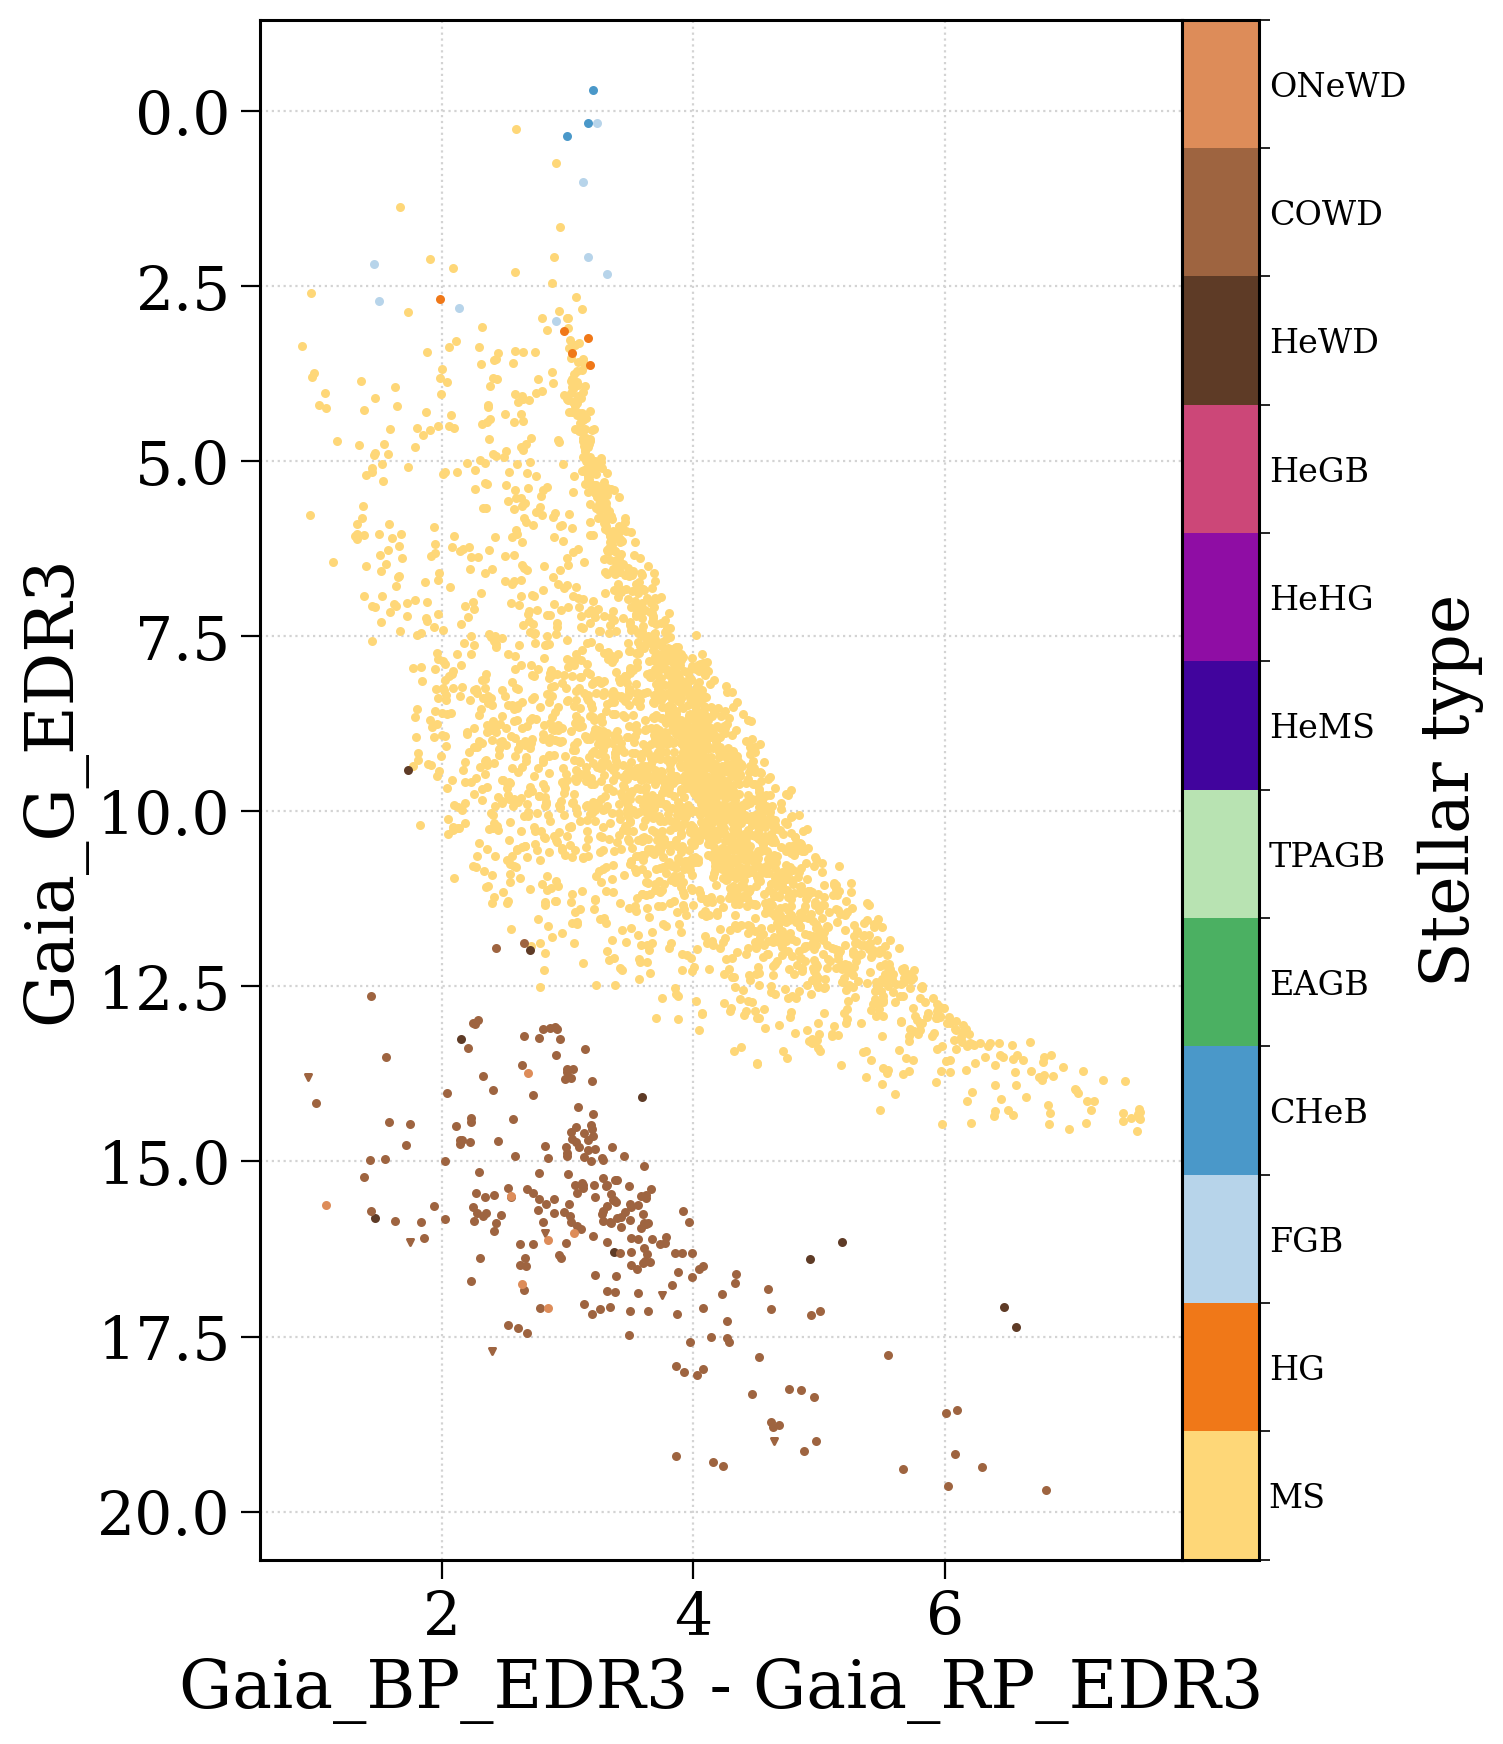

In [6]:
cogsworth.plot.plot_cmd(p, m_filter="Gaia_G_EDR3", c_filter_1="Gaia_BP_EDR3", c_filter_2="Gaia_RP_EDR3", s=5);

In [7]:
p.get_observables(filters=["Gaia_G_EDR3", "Gaia_BP_EDR3", "Gaia_RP_EDR3"], ignore_extinction=True,
                  assume_mw_galactocentric=False, distances=np.ones(len(p.final_pos)) * u.kpc,
                  silence_bounds_warning=True)

,Av_1,Av_2,M_abs_1,m_app_1,M_abs_2,m_app_2,Gaia_G_EDR3_app_1,Gaia_G_EDR3_app_2,teff_obs,log_g_obs,secondary_brighter,Gaia_G_EDR3_abs_1,Gaia_G_EDR3_abs_2,Gaia_BP_EDR3_app_1,Gaia_BP_EDR3_app_2,Gaia_BP_EDR3_abs_1,Gaia_BP_EDR3_abs_2,Gaia_RP_EDR3_app_1,Gaia_RP_EDR3_app_2,Gaia_RP_EDR3_abs_1,Gaia_RP_EDR3_abs_2
0,0.0,0.0,10.505755,20.505755,10.600416,20.600416,20.545743,inf,3415.421463,5.064212,False,10.545743,inf,21.698279,inf,11.698279,inf,19.492199,inf,9.492199,inf
1,0.0,0.0,5.283717,15.283717,7.521517,17.521517,15.149315,inf,5682.065254,4.496443,False,5.149315,inf,15.485121,inf,5.485121,inf,14.640260,inf,4.640260,inf
2,0.0,0.0,8.853115,18.853115,12.317237,22.317237,19.576113,inf,3617.686782,4.876034,False,9.576113,inf,20.700822,inf,10.700822,inf,18.524299,inf,8.524299,inf
3,0.0,0.0,9.225887,19.225887,9.263763,19.263763,19.144157,inf,3613.084029,4.933974,False,9.144157,inf,20.182911,inf,10.182911,inf,18.134883,inf,8.134883,inf
4,0.0,0.0,9.818430,19.818430,10.761263,20.761263,20.226211,inf,3499.143059,4.985876,False,10.226211,inf,21.394875,inf,11.394875,inf,19.155700,inf,9.155700,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3296,0.0,0.0,8.034504,18.034504,9.152102,19.152102,18.148468,inf,3920.103932,4.786464,False,8.148468,inf,18.994179,inf,8.994179,inf,17.246538,inf,7.246538,inf
3297,0.0,0.0,11.279482,21.279482,12.249783,22.249783,21.799909,inf,3367.180116,5.207358,False,11.799909,inf,23.133720,inf,13.133720,inf,20.679230,inf,10.679230,inf
3298,0.0,0.0,6.913101,16.913101,10.631729,20.631729,17.159311,inf,4301.280655,4.640613,False,7.159311,inf,17.844081,inf,7.844081,inf,16.360832,inf,6.360832,inf
3299,0.0,0.0,8.530674,18.530674,12.907017,22.907017,19.045411,inf,3756.241120,4.850489,False,9.045411,inf,19.960413,inf,9.960413,inf,18.100135,inf,8.100135,inf
